# Module 2: Regression Models to Predict Bus Arrival Delays

Student: Svavar Hrafn Ágústsson

Date: 7. Sept 2023

## Importing and Exploring the Data

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score
import os

# The path of the dataset
url = 'modeChoiceData.csv'
# Load the data use the pandas
data = pd.read_csv(url)
data.head(10)

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,choice
0,1,275,50,330,35,20,80,65,55,food,120,45,5,no-frills,air
1,2,275,45,330,15,5,70,110,40,wifi,170,55,25,food,rail
2,3,275,45,390,15,25,70,80,55,no-frills,155,35,5,no-frills,rail
3,4,300,45,300,15,10,60,110,40,wifi,155,65,20,no-frills,rail
4,5,390,35,390,35,10,60,95,45,wifi,155,65,15,food,rail
5,6,275,40,360,30,20,50,80,50,no-frills,155,55,5,food,rail
6,7,250,50,360,25,15,60,110,45,food,120,65,20,wifi,rail
7,8,275,30,390,25,15,90,65,40,no-frills,155,65,25,wifi,car
8,9,390,30,390,25,25,90,65,35,food,120,65,15,no-frills,air
9,10,275,50,330,25,25,70,80,50,no-frills,120,55,5,food,air


In [4]:
data.describe()

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,time_rail,cost_rail,access_rail
count,3080.00000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000
mean,1540.50000,312.725649,40.024351,370.724026,24.965909,15.094156,69.866883,80.029221,45.060065,142.878247,54.944805,14.840909
std,889.26374,50.390302,7.083073,37.369174,7.100207,7.099092,14.241063,21.254481,7.073683,17.727864,14.069500,7.089921
min,1.00000,250.000000,30.000000,300.000000,15.000000,5.000000,50.000000,50.000000,35.000000,120.000000,35.000000,5.000000
25%,770.75000,275.000000,35.000000,345.000000,20.000000,10.000000,60.000000,65.000000,40.000000,130.000000,45.000000,10.000000
50%,1540.50000,300.000000,40.000000,390.000000,25.000000,15.000000,70.000000,80.000000,45.000000,140.000000,55.000000,15.000000
75%,2310.25000,345.000000,45.000000,390.000000,30.000000,20.000000,80.000000,95.000000,50.000000,155.000000,65.000000,20.000000
max,3080.00000,390.000000,50.000000,420.000000,35.000000,25.000000,90.000000,110.000000,55.000000,170.000000,75.000000,25.000000


In [5]:
data.groupby('choice').size()

choice
air      705
bus      109
car      978
rail    1288
dtype: int64

## Preprocess to encoding categorical variables

1. Label Encoding (unique integer value)

In [7]:
## Label Encoding
# Import the pandas library as 'pd' for data manipulation and analysis
import pandas as pd

# Import the LabelEncoder class from scikit-learn for encoding categorical data
from sklearn.preprocessing import LabelEncoder

# Create a list of lists containing data with two columns: 'Distance' and 'Education level'
data = [[10, 'high school'], [20, 'graduate degree'], [12, 'high school'], [16, 'graduate degree'], [22, 'undergraduate degree']]

# Create a DataFrame 'df' from the 'data' list with column names 'Distance' and 'Education level'
df = pd.DataFrame(data, columns=['Distance', 'Education level'])

# Initialize a LabelEncoder object as 'encoder' to encode the categorical variable
encoder = LabelEncoder()

# Use the LabelEncoder to transform the 'Education level' column from categorical to numerical values
df['Education level'] = encoder.fit_transform(df['Education level'])

# Display the DataFrame 'df' to show the results
df


,Distance,Education level
0,10,1
1,20,0
2,12,1
3,16,0
4,22,2


2. One-Hot Encoding (represented with 0/1)

In [8]:
## One-Hot Encoding
# create a sample dataframe with a categorical variable
data = [[10, 'high school'], [20, 'graduate degree'], [12, 'high school'], [16, 'graduate degree'], [22, 'undergraduate degree']]
df = pd.DataFrame(data, columns=['Distance', 'Education level'])

# perform one-hot encoding on the 'Education level' column
df = pd.get_dummies(df, columns=['Education level'])
df

,Distance,Education level_graduate degree,Education level_high school,Education level_undergraduate degree
0,10,0,1,0
1,20,1,0,0
2,12,0,1,0
3,16,1,0,0
4,22,0,0,1


3. Dummy Encoding: Same as one-hot but with one less collumn

In [10]:
## Dummy Encoding
# Create a sample dataframe with categorical variable
data = [[10, 'high school'], [20, 'graduate degree'], [12, 'high school'], [16, 'graduate degree'], [22, 'undergraduate degree']]
df = pd.DataFrame(data, columns=['Distance', 'Education level'])

# Use pandas 'get_dummies' function to perform dummy encoding on the 'Education level' column
# - 'drop_first=True' drops the first category to avoid multicollinearity (dummy variable trap)
# - 'prefix='Education level'' adds a prefix to the new dummy variable column names
dummy_df = pd.get_dummies(df['Education level'], drop_first=True, prefix='Education level')

#Concatenate the original DataFrame 'df' with the newly created dummy variables in 'dummy_df'
df = pd.concat([df, dummy_df], axis=1)

# Drop the original 'Education level' column as it's no longer needed
df=df.drop('Education level',axis=1)
df

,Distance,Education level_high school,Education level_undergraduate degree
0,10,1,0
1,20,0,0
2,12,1,0
3,16,0,0
4,22,0,1


# Practice task 3.1 - Develop the classification model (logistic regression) for travel mode choices 

In [17]:
# Columns 'service_air' and 'service_rail' will be one-hot encoded
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

# Create feature variable 'x' by dropping the 'choice' and 'ID' columns from the DataFrame
# Create target variable 'y' by selecting the 'choice' column from the DataFrame
x = df.drop(['choice','ID',], axis=1)
y = df['choice']

# Split the dataset into training and testing sets, with 80% for training and 20% for testing
# - 'random_state' ensures reproducibility of results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# Create a LogisticRegression model with a maximum of 1000 iterations and a fixed random seed
model = LogisticRegression(max_iter=1000, random_state=0)

# Train the LogisticRegression model on the training data
model.fit(x_train, y_train)

/Users/svabbi16/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

The accuracy of the model is: 0.5584415584415584


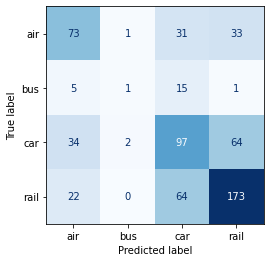

In [18]:
# Create a confusion matrix display from the trained 'model' using the test data 'x_test' and true labels 'y_test'
# - 'cmap' sets the color map for the display to 'Blues'
# - 'colorbar=False' hides the color bar in the confusion matrix
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)

# Calculate the accuracy of the model by comparing predicted labels to true labels
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

In [20]:
# Select a single test case from the feature data 'x' using integer-based indexing (e.g., 100th row)
test_case = x.iloc[100]

# Use the trained 'model' to predict the class probabilities for the selected test case
predicted_probabilities = model.predict_proba(pd.DataFrame(test_case).T)

# Use the trained 'model' to predict the class label for the selected test case
predicted_label = model.predict(pd.DataFrame(test_case).T)

print(test_case)
print(predicted_probabilities)
print(predicted_label)

time_car                  275
cost_car                   45
time_bus                  360
cost_bus                   25
access_bus                 20
time_air                   90
cost_air                   65
access_air                 35
time_rail                 130
cost_rail                  55
access_rail                20
service_air_food            0
service_air_no-frills       0
service_air_wifi            1
service_rail_food           1
service_rail_no-frills      0
service_rail_wifi           0
Name: 100, dtype: int64
[[0.43012833 0.02131375 0.29493669 0.25362123]]
['air']


We decrease the travel time of car to see the changes of predicted probabilities and the predicted label.


In [24]:
modified_test_case=test_case.copy()
modified_test_case['time_car']=100
predicted_probabilities = model.predict_proba(pd.DataFrame(modified_test_case).T)
predicted_label = model.predict(pd.DataFrame(modified_test_case).T)

print(modified_test_case)
print(predicted_probabilities)
print(predicted_label)

time_car                  100
cost_car                   45
time_bus                  360
cost_bus                   25
access_bus                 20
time_air                   90
cost_air                   65
access_air                 35
time_rail                 130
cost_rail                  55
access_rail                20
service_air_food            0
service_air_no-frills       0
service_air_wifi            1
service_rail_food           1
service_rail_no-frills      0
service_rail_wifi           0
Name: 100, dtype: int64
[[0.22279398 0.00661962 0.66242778 0.10815862]]
['car']


# Practice task 3.2 - Explore the performance of different categorization embedding methods

The accuracy of the model is: 0.5698051948051948


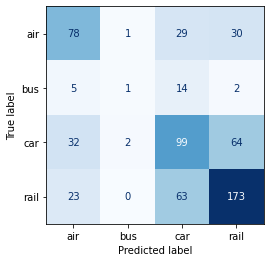

In [26]:
#Use 'warnings.filterwarnings' to suppress redundant 'ConvergenceWarning' messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

#(1) One-Hot Encoding
# df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

#(2) Label Encoding
encoder = LabelEncoder()
df=data.copy()
df['service_air'] = encoder.fit_transform(df['service_air'])
df['service_rail'] = encoder.fit_transform(df['service_rail'])

#(3) Dummy Encoding
# df=data.copy()
# dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)
# df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

# Practice task 3.3 - Explore the performance of different classification models

The accuracy of the model is: 0.5584415584415584


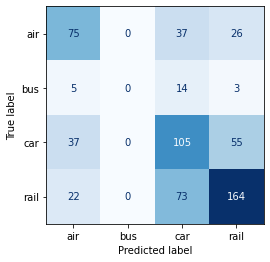

In [40]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Different methods used
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

The accuracy of the model is: 0.5584415584415584


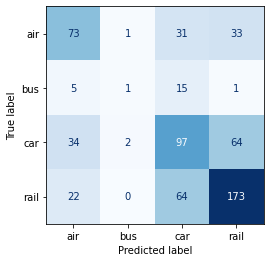

In [41]:
#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)

model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

The accuracy of the model is: 0.5243506493506493


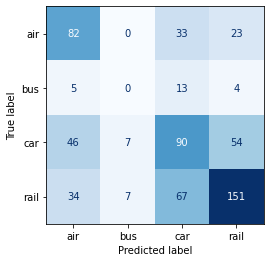

In [42]:
#(2)KNN
model=KNeighborsClassifier()

model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

The accuracy of the model is: 0.5146103896103896


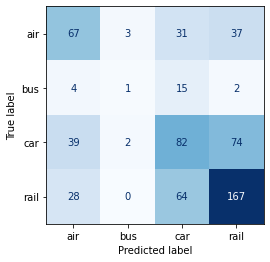

In [43]:
#(3)RF
model = RandomForestClassifier(random_state=0)

model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

The accuracy of the model is: 0.5211038961038961


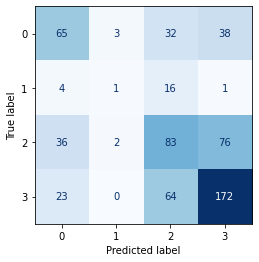

In [45]:
#(4)XGBoost
## Use the 'map' method to replace categorical labels in 'y_train' with their corresponding numerical values
## Otherwise, It will report errors!
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()

model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

The accuracy of the model is: 0.5584415584415584


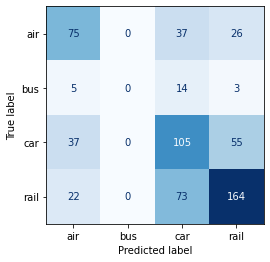

In [44]:
#(5)SVM
model= SVC(kernel="linear")

model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

# Practice task 3.4 - Choose the best model based on different accuracy measures

Accuracy: 0.5584415584415584
Precision: [0.54477612 0.25       0.46859903 0.63837638]
Recall: [0.52898551 0.04545455 0.49238579 0.66795367]


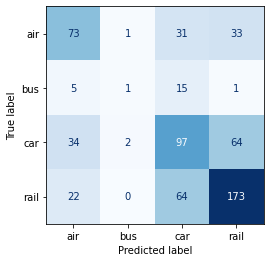

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import os

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)

model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)

# Calculate different measurements
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

Accuracy: 0.5146103896103896
Precision: [0.48550725 0.16666667 0.42708333 0.59642857]
Recall: [0.48550725 0.04545455 0.41624365 0.64478764]


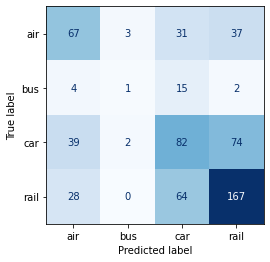

In [49]:
#(2)KNN
model = RandomForestClassifier(random_state=0)

model.fit(x_train, y_train)
cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)

# Calculate different measurements
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

Logistic Regression is a slightly better choice than the KKN. Having a 4% higher accuracy and some higher values in Precision and Recall.

# Assignment task - Find the best classification model for the travel mode choices prediction (assignment submission)

### 11 One-Hot Coding & Logistic Regression

{'C': 0.01}
Accuracy: 0.5746753246753247
Precision: [0.55244755 0.25       0.48803828 0.66153846]
Recall: [0.57246377 0.04545455 0.5177665  0.66409266]


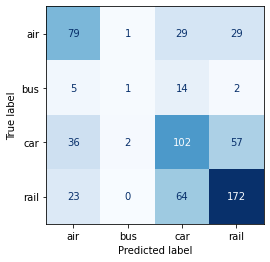

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

url = 'modeChoiceData.csv'
data = pd.read_csv(url)

##---------------------The choice of encoding method---------------------------
#(1) One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

#(2) Label Encoding
# encoder = LabelEncoder()
# df=data.copy()
# df['service_air'] = encoder.fit_transform(df['service_air'])
# df['service_rail'] = encoder.fit_transform(df['service_rail'])

#(3) Dummy Encoding
# df=data.copy()
# dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)
# df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

##---------------------The choice of classification model---------------------------
#(1)LR
params = {
     'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
model = LogisticRegression(max_iter=1000, random_state=0)

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

### 12 One-Hot Coding & KNN

{'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.5113636363636364
Precision: [0.47191011 0.375      0.44242424 0.58490566]
Recall: [0.60869565 0.13636364 0.37055838 0.5984556 ]


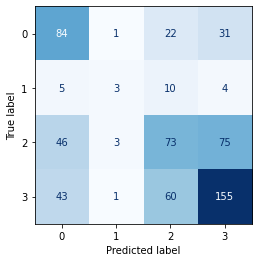

In [62]:
#(2)KNN
params = {
     'n_neighbors': [3, 5, 7, 9],
     'weights': ['uniform', 'distance']
}
model=KNeighborsClassifier()

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')


### 13 One-Hot Coding & RF

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.5113636363636364
Precision: [0.49635036 0.25       0.4120603  0.5942029 ]
Recall: [0.49275362 0.04545455 0.41624365 0.63320463]


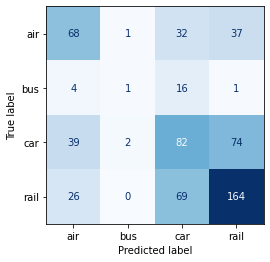

In [53]:
#(3)RF
params = {
     'n_estimators': [100, 200, 300],
     'max_depth': [None, 10, 20, 30],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=0)

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

### 14 One-Hot Coding & XGBoost

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


/Users/svabbi16/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


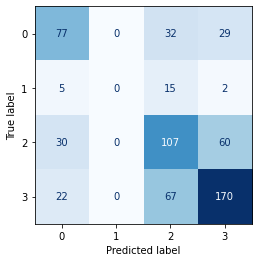

In [54]:
#(4)XGBoost
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

### 15 One-Hot Coding & SVM

{'C': 0.1}
Accuracy: 0.564935064935065
Precision: [0.54861111 0.         0.4556962  0.68510638]
Recall: [0.57246377 0.         0.54822335 0.62162162]


/Users/svabbi16/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


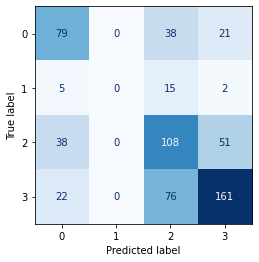

In [55]:
#(5)SVM
## Note: It will costs a long time.
params = {
    'C': [0.1, 1, 10],
}


model= SVC(kernel="linear")

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

### 21 Label Encoding & Logistic Regression

{'C': 0.1}
Accuracy: 0.5698051948051948
Precision: [0.56521739 0.25       0.48292683 0.64312268]
Recall: [0.56521739 0.04545455 0.50253807 0.66795367]


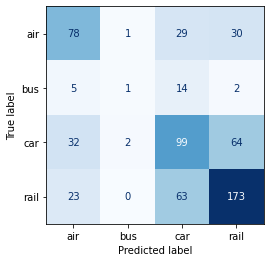

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

url = 'modeChoiceData.csv'
data = pd.read_csv(url)

##---------------------The choice of encoding method---------------------------
#(1) One-Hot Encoding
#df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

#(2) Label Encoding
encoder = LabelEncoder()
df=data.copy()
df['service_air'] = encoder.fit_transform(df['service_air'])
df['service_rail'] = encoder.fit_transform(df['service_rail'])

#(3) Dummy Encoding
# df=data.copy()
# dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)
# df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

##---------------------The choice of classification model---------------------------
#(1)LR
params = {
     'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
model = LogisticRegression(max_iter=1000, random_state=0)

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

### 22 Label Encoding & KNN

{'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.5113636363636364
Precision: [0.47191011 0.375      0.44242424 0.58490566]
Recall: [0.60869565 0.13636364 0.37055838 0.5984556 ]


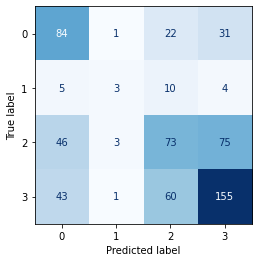

In [61]:
#(2)KNN
params = {
     'n_neighbors': [3, 5, 7, 9],
     'weights': ['uniform', 'distance']
}
model=KNeighborsClassifier()

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')


### 23 Label Encoding & RF

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.5162337662337663
Precision: [0.49635036 0.25       0.42156863 0.60147601]
Recall: [0.49275362 0.04545455 0.43654822 0.62934363]


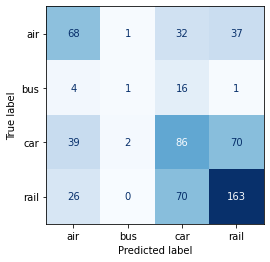

In [58]:
#(3)RF
params = {
     'n_estimators': [100, 200, 300],
     'max_depth': [None, 10, 20, 30],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=0)

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

### 24 Label Encoding & XGBoost

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


/Users/svabbi16/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


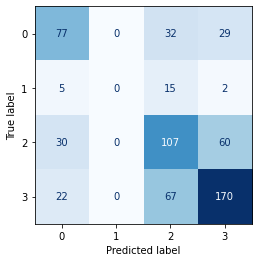

In [59]:
#(4)XGBoost
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

### 25 Label Encoding & SVM

{'C': 0.1}
Accuracy: 0.551948051948052
Precision: [0.51948052 0.         0.45959596 0.64015152]
Recall: [0.57971014 0.         0.46192893 0.65250965]


/Users/svabbi16/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


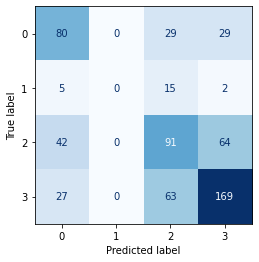

In [60]:
#(5)SVM
## Note: It will costs a long time.
params = {
    'C': [0.1, 1, 10],
}


model= SVC(kernel="linear")

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')